### Personal Portfolio

In [168]:
# Import libraries
import pandas as pd 
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import numpy as np
import datetime
from pytickersymbols import PyTickerSymbols
import matplotlib.pyplot as plt
import cvxpy as cp
import gurobipy

In [80]:
# Initialize the parameters
start = '2020-01-01'
end = datetime.date.today()
symbols = ["AAPL"]

In [81]:
# Download the data
data = pdr.get_data_yahoo(symbols,start=start,end=end)['Adj Close'].dropna()
data = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


In [82]:
# Initialize the headers
data.columns = symbols

In [84]:
# Quick visualization
data.head()

,AAPL
Date,
2019-12-31,72.337990
2020-01-02,73.988464
2020-01-03,73.269150
2020-01-06,73.852982
2020-01-07,73.505661


<AxesSubplot:xlabel='Date'>

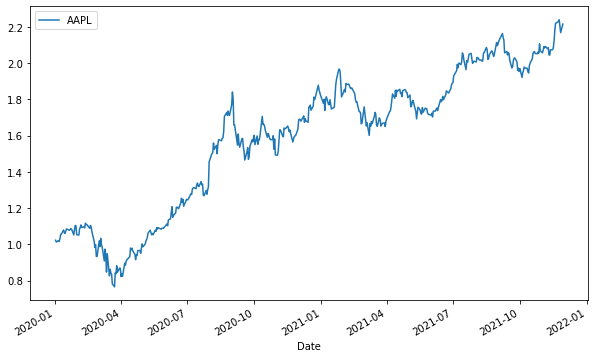

In [85]:
# Cumulative sum of the log-returns
data_fluct = np.log(data/data.shift(1))

# Plot the returns 
data_fluct.cumsum().apply(np.exp).plot(figsize=(10,6))

In [86]:
# Initialize the paramters for the MVA methods

window = 20
data['min'] = data[symbols].rolling(window=window).min()
data['mean'] = data[symbols].rolling(window=window).mean()
data['std'] = data[symbols].rolling(window=window).std()
data['median'] = data[symbols].rolling(window=window).median()
data['max'] = data[symbols].rolling(window=window).max()
data['ewma'] = data[symbols].ewm(halflife=0.5,min_periods=window).mean()

<AxesSubplot:xlabel='Date'>

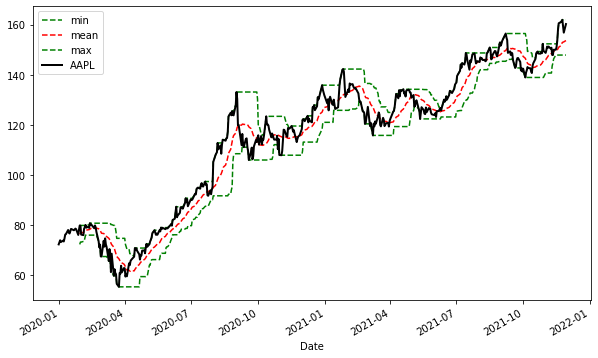

In [87]:
# Plot the moving average on our data
ax = data[['min','mean','max']].plot(figsize=(10,6),style=['g--','r--','g--'])
data[symbols].plot(ax=ax,lw=2,style='k-')

In [88]:
# Moving average method for trading
data['SMA1'] = data[symbols].rolling(window=42).mean()
data['SMA2'] = data[symbols].rolling(window=100).mean()
data['position'] = np.where(data['SMA1'] > data['SMA2'],1,-1)

<AxesSubplot:xlabel='Date'>

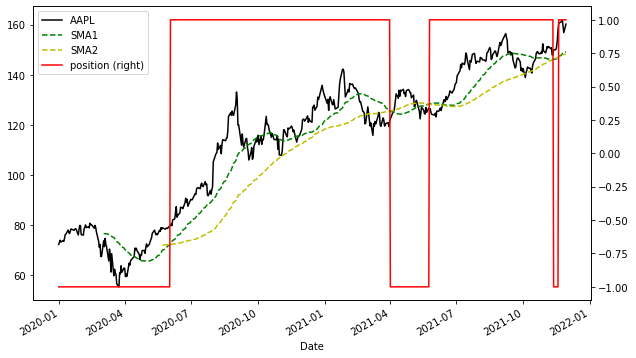

In [89]:
# Visualization of the method
ax = data[symbols].plot(figsize=(10,6),style='k-')
data[['SMA1','SMA2','position']].plot(ax= ax, style=['g--','y--','r'],secondary_y='position')

In [91]:
# Store all the symbols
stock_data = PyTickerSymbols()

In [134]:
# Helper functions
def port_return(weights):
    return np.sum(rets.mean()*weights)*252

def port_vol(weights):
    return np.sqrt(weights.T@rets.cov()*252@weights)

In [115]:
# Portfolio optimization for the NASDAQ 100
NASDAQ_100 = stock_data.get_nasdaq_100_nyc_yahoo_tickers()
NASDAQ_100.remove('CTRP')
print(NASDAQ_100)

['AAPL', 'CSCO', 'INTC', 'MSFT', 'WBA', 'ATVI', 'ADBE', 'GOOGL', 'GOOG', 'AMZN', 'AMGN', 'ADI', 'AMAT', 'ADSK', 'ADP', 'BIDU', 'BAIDF', 'BIIB', 'CERN', 'CHTR', 'CHKP', 'CTSH', 'CMCSA', 'COST', 'CSX', 'TCOM', 'DLTR', 'EBAY', 'EA', 'FB', 'FAST', 'FISV', 'GILD', 'ILMN', 'INCY', 'INTU', 'ISRG', 'JD', 'JDCMF', 'KHC', 'LRCX', 'MAR', 'MCHP', 'MU', 'MDLZ', 'MNST', 'NTES', 'NETTF', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'PCAR', 'PAYX', 'PYPL', 'QCOM', 'REGN', 'ROST', 'SIRI', 'SWKS', 'SBUX', 'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRTX', 'XLNX', 'BKNG', 'EXC', 'HON', 'AMD', 'ALGN', 'AEP', 'ANSS', 'AVGO', 'CDNS', 'CTAS', 'CPRT', 'FOXA', 'FXBY', 'FOX', 'IDXX', 'KLAC', 'SNPS', 'VRSN', 'ASMLF', 'ASML', 'CDW', 'DXCM', 'PEP', 'XEL', 'TEAM', 'DOCU', 'KDP', 'LULU', 'MRVL', 'MTCH', 'MELI', 'MRNA', 'OKTA', 'PTON', 'PDD', 'SGEN', 'SPLK', 'WDAY', 'ZM', 'CRWD']


In [160]:
# Initialize the parameters
start = '2010-01-01'
end = datetime.date.today()
symbols = NASDAQ_100
noa = len(symbols)
r_f = 0.01

In [161]:
# Download the data
data = pdr.get_data_yahoo(symbols,start=start,end=end)['Adj Close'].dropna()
data = pd.DataFrame(data)

[*********************100%***********************]  107 of 107 completed


In [162]:
data.head()

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,XLNX,ZM
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-08,142.817276,605.950012,163.220383,200.944824,294.470001,83.816841,616.789978,132.074814,89.739998,240.389877,...,652.809998,186.050110,180.953690,231.809998,197.740005,45.821606,237.089996,67.039131,133.520203,386.010010
2021-07-09,144.681763,604.500000,165.570450,202.796387,295.380005,83.895439,627.190002,134.436661,90.900002,241.295227,...,656.950012,188.056503,181.452988,233.029999,198.160004,46.498337,239.940002,67.207970,135.336807,385.079987
2021-07-12,144.073563,600.200012,166.845062,202.826263,291.929993,83.915092,642.859985,136.330154,90.809998,240.478439,...,685.700012,189.687302,179.765366,229.160004,198.339996,46.635647,236.389999,67.376808,134.827759,379.119995
2021-07-13,145.210190,605.010010,166.556274,202.985535,296.420013,83.748062,642.400024,135.821899,90.260002,240.931107,...,668.539978,188.975662,180.913742,228.490005,198.330002,46.410069,232.990005,67.118591,133.709854,378.390015
2021-07-14,148.709824,608.830017,165.460922,203.572861,297.100006,84.671608,635.090027,135.184097,89.050003,240.803192,...,653.380005,189.054733,182.072098,230.639999,197.889999,45.978531,232.029999,67.625099,132.492126,360.609985


In [163]:
# Returns
rets = np.log(data/data.shift(1))

In [164]:
data.head()

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,XLNX,ZM
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-08,142.817276,605.950012,163.220383,200.944824,294.470001,83.816841,616.789978,132.074814,89.739998,240.389877,...,652.809998,186.050110,180.953690,231.809998,197.740005,45.821606,237.089996,67.039131,133.520203,386.010010
2021-07-09,144.681763,604.500000,165.570450,202.796387,295.380005,83.895439,627.190002,134.436661,90.900002,241.295227,...,656.950012,188.056503,181.452988,233.029999,198.160004,46.498337,239.940002,67.207970,135.336807,385.079987
2021-07-12,144.073563,600.200012,166.845062,202.826263,291.929993,83.915092,642.859985,136.330154,90.809998,240.478439,...,685.700012,189.687302,179.765366,229.160004,198.339996,46.635647,236.389999,67.376808,134.827759,379.119995
2021-07-13,145.210190,605.010010,166.556274,202.985535,296.420013,83.748062,642.400024,135.821899,90.260002,240.931107,...,668.539978,188.975662,180.913742,228.490005,198.330002,46.410069,232.990005,67.118591,133.709854,378.390015
2021-07-14,148.709824,608.830017,165.460922,203.572861,297.100006,84.671608,635.090027,135.184097,89.050003,240.803192,...,653.380005,189.054733,182.072098,230.639999,197.889999,45.978531,232.029999,67.625099,132.492126,360.609985


In [140]:
# Weights 
weights = np.random.random(noa)
weights = weights/sum(weights)

weights.sum()

0.9999999999999994

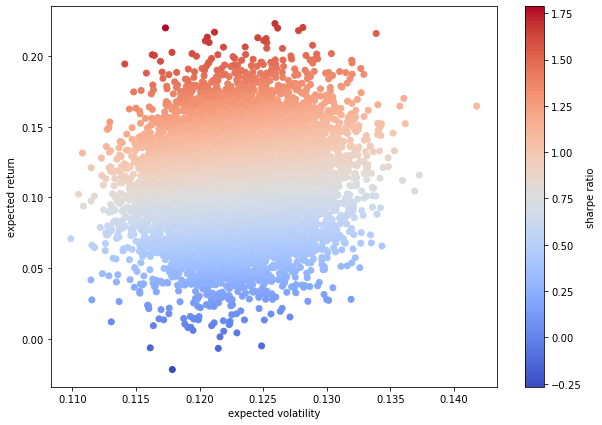

In [166]:
N = 10000 # Number of iteration
prets = []
pvol = []
for k in range(N):
    weights = np.random.random(noa)
    weights = weights/np.sum(weights)
    prets.append(port_return(weights))
    pvol.append(port_vol(weights))
prets = np.array(prets)
pvol = np.array(pvol)

plt.figure(figsize=(10,7))
plt.scatter(pvol,prets,c=(prets-r_f)/pvol,marker='o',cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='sharpe ratio')

In [194]:
# Optimization problem:

# Definition of the variable
amount = 100000
w = cp.Variable(noa)
obj = cp.Minimize(cp.quad_form(w,rets.cov()*252))
cons = [port_return(w)>=0.1, cp.sum(w)==1, w>=0, w*amount >= 1]
prob = cp.Problem(obj, cons)
prob.solve(solver=cp.GUROBI)

/Users/kansara/opt/anaconda3/lib/python3.7/site-packages/cvxpy/interface/numpy_interface/ndarray_interface.py:47: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if result.dtype in [numpy.complex, numpy.float64]:
/Users/kansara/opt/anaconda3/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_M

0.004244583171342719

In [195]:
w.value

array([1.00001091e-05, 1.00001243e-05, 1.00004100e-05, 1.00002171e-05,
       1.00000621e-05, 1.29182906e-01, 1.00001394e-05, 1.00001064e-05,
       1.00002253e-05, 1.00001890e-05, 1.00004790e-05, 1.00000918e-05,
       1.00000765e-05, 1.00000774e-05, 1.68403369e-02, 1.00001525e-05,
       2.08997594e-02, 1.00001129e-05, 1.00013424e-05, 1.74254331e-02,
       1.00000799e-05, 1.00001612e-05, 1.00019462e-05, 1.00010882e-05,
       9.89545152e-05, 1.00000969e-05, 2.27752412e-02, 1.00000789e-05,
       6.15294326e-03, 1.00001909e-05, 8.52170567e-03, 1.00001933e-05,
       1.00001944e-05, 1.00000904e-05, 1.00006482e-05, 1.00002379e-05,
       6.66452174e-02, 7.61706302e-03, 1.00005007e-05, 1.00005667e-05,
       1.00001175e-05, 1.00000793e-05, 1.00002231e-05, 1.00001882e-05,
       1.17933787e-01, 4.74571940e-02, 1.00003018e-05, 1.00002311e-05,
       1.00001456e-05, 1.00002802e-05, 1.00001716e-05, 1.42579520e-02,
       4.83573448e-02, 1.00001551e-05, 1.00002282e-05, 1.00001572e-05,
      

In [196]:
# Amount to invest
Investment = pd.DataFrame(index = symbols, data = (w.value*amount))
#print((w.value*amount))

In [197]:
Investment

,0
AAPL,1.000011
CSCO,1.000012
INTC,1.000041
MSFT,1.000022
WBA,1.000006
...,...
SGEN,1.000014
SPLK,1.000018
WDAY,487.234830
ZM,1.000013
